#Library Imports

In [1]:
import pandas as pd
import numpy as np
from numpy.ma.core import size
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

import warnings
warnings.filterwarnings("ignore")

# Dataset Imports - from Google drive

In [2]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
raw_data_path = r'/content/gdrive/MyDrive/Datasets/Loan_Default.csv'

In [4]:
raw_data = pd.read_csv(raw_data_path)
raw_data.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


# Exploratory Data Analysis

## Defining EDA function

In [5]:
def get_metadata(dataframe):
    '''Gets all the Metadata Information about the Dataframe'''
    print("\nBASIC INFORMATION\n")
    print(dataframe.info())
    print("=" * 150)
    print("STATISTICAL INFORMATION\n")
    display(dataframe.describe(include='all').T)
    print("=" * 150)
    print("Dataframe Shape\n", dataframe.shape)
    print("=" * 150)
    print("Number of Duplicate Rows\n", dataframe.duplicated().sum())
    print("=" * 150)
    print("NULL Values Check")
    for col in dataframe.columns:
        print(col, dataframe[col].isnull().sum())
    print("=" * 150)
    print("UNIQUE VALUES IN EVERY COLUMN")
    for col in dataframe.columns:
        print(col)
        print(dataframe[col].unique())
        print('-' * 150)
    categorical_cols = [var for var in dataframe.columns if dataframe[var].dtype=='O']
    numerical_cols = [var for var in dataframe.columns if dataframe[var].dtype!='O']
    print("CATEGORICAL FEATURES\n", categorical_cols)
    print("=" * 150)
    print("NUMERICAL FEATURES\n", numerical_cols)
    print("=" * 150)
    print("Negative Valued Column")
    for col in numerical_cols:
        if min(dataframe[col]) < 0:
            print(col)
    print("=" * 150)
    display(dataframe.head(3))

In [6]:
get_metadata(raw_data)


BASIC INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_c

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,148670.0,NaN,NaN,NaN,99224.5,42917.476598,24890.0,62057.25,99224.5,136391.75,173559.0
year,148670.0,NaN,NaN,NaN,2019.0,0.0,2019.0,2019.0,2019.0,2019.0,2019.0
loan_limit,145326,2,cf,135348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,148670,4,Male,42346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
approv_in_adv,147762,2,nopre,124621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_type,148670,3,type1,113173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_purpose,148536,4,p3,55934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_Worthiness,148670,2,l1,142344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open_credit,148670,2,nopc,148114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
business_or_commercial,148670,2,nob/c,127908,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataframe Shape
 (148670, 34)
Number of Duplicate Rows
 0
NULL Values Check
ID 0
year 0
loan_limit 3344
Gender 0
approv_in_adv 908
loan_type 0
loan_purpose 134
Credit_Worthiness 0
open_credit 0
business_or_commercial 0
loan_amount 0
rate_of_interest 36439
Interest_rate_spread 36639
Upfront_charges 39642
term 41
Neg_ammortization 121
interest_only 0
lump_sum_payment 0
property_value 15098
construction_type 0
occupancy_type 0
Secured_by 0
total_units 0
income 9150
credit_type 0
Credit_Score 0
co-applicant_credit_type 0
age 200
submission_of_application 200
LTV 15098
Region 0
Security_Type 0
Status 0
dtir1 24121
UNIQUE VALUES IN EVERY COLUMN
ID
[ 24890  24891  24892 ... 173557 173558 173559]
------------------------------------------------------------------------------------------------------------------------------------------------------
year
[2019]
-------------------------------------------------------------------------------------------------------------------------------------------

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0


**Inference**:

*  148670 rows, 34 columns
*   8 Float Columns, 5 Integer Column, 21 Object Columns
*  Column Names can be converted to lower_case for ease
*   From the statistical summary, we can infer the following:
    * The data is for the year 2019 - This column can be dropped, since, all the values are '2019'
    * rate_of_interest cannot be 0.0 - Contains error values
    * loan_amount column has outliers
      *  min(0th percentile) - 16500.0
      *  25th percentile - 196500.0
      *  50th percentile - 296500.0
      *  75th percentile - 436500.0
      *  max(100th percentile) - 3576500.0
    * Upfront_charges column has outliers
      *  min(0th percentile) - 0.0
      *  25th percentile - 581.49
      *  50th percentile - 2596.45
      *  75th percentile - 4812.5
      *  max(100th percentile) - 60000.0
    * term column is in months. This can be converted to years as a feature engineering process
    * property_value column has outliers
      *  min(0th percentile) - 8000.0
      *  25th percentile - 268000.0
      *  50th percentile - 418000.0
      *  75th percentile - 628000.0
      *  max(100th percentile) - 16508000.0
    * income column has outliers
      *  min(0th percentile) - 0.0
      *  25th percentile - 3720.0
      *  50th percentile - 5760.0
      *  75th percentile - 8520.0
      *  max(100th percentile) - 578580.0
    * LTV column has outliers
      *  min(0th percentile) - 0.967478
      *  25th percentile - 60.47486
      *  50th percentile - 75.13587
      *  75th percentile - 86.184211
      *  max(100th percentile) - 7831.25
      


# Exploratory Data Analysis

In [7]:
raw_data.fillna('Nan values').isna().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

loan_limit


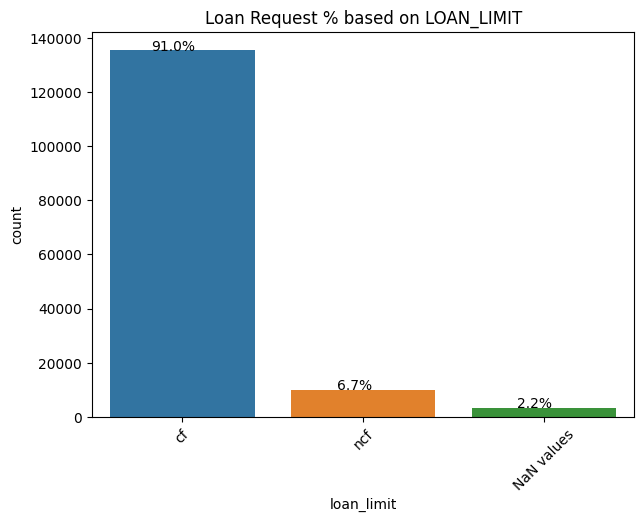

Gender


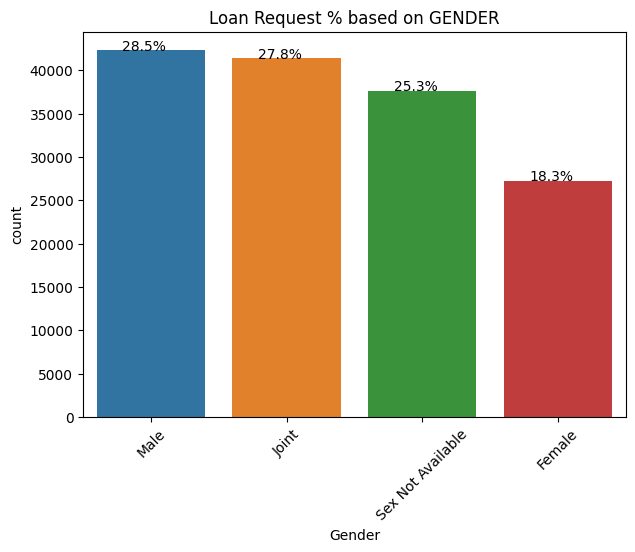

approv_in_adv


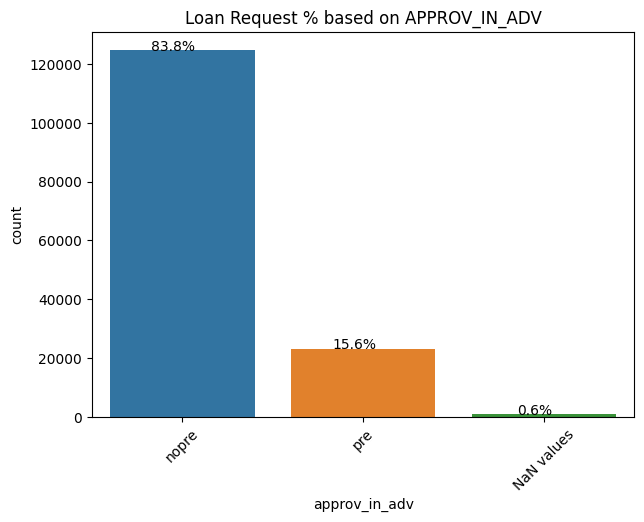

loan_type


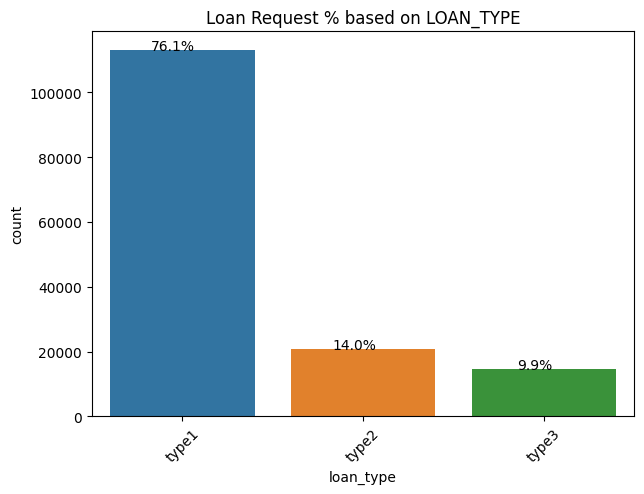

loan_purpose


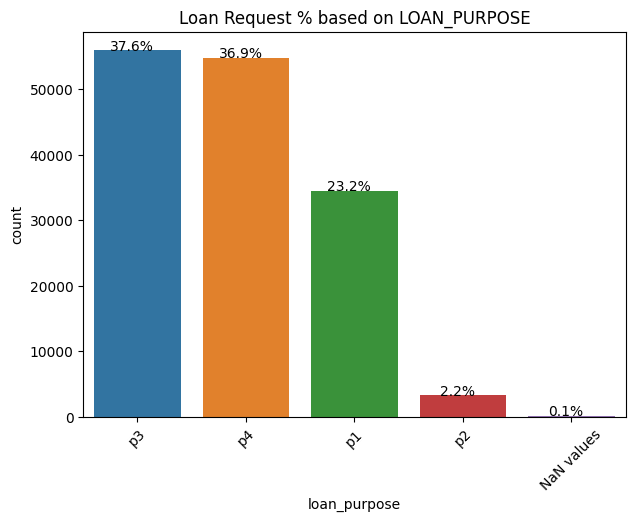

Credit_Worthiness


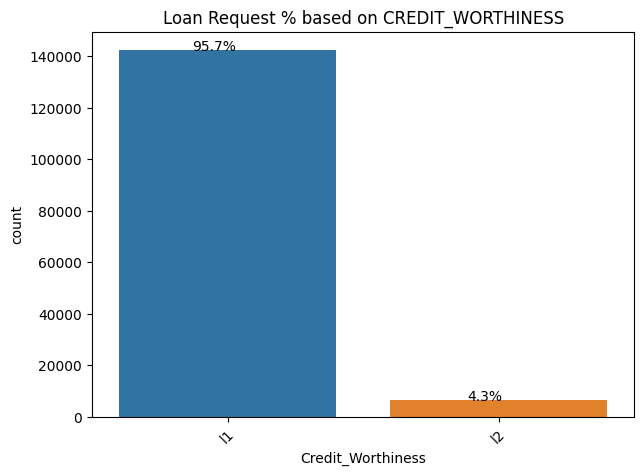

open_credit


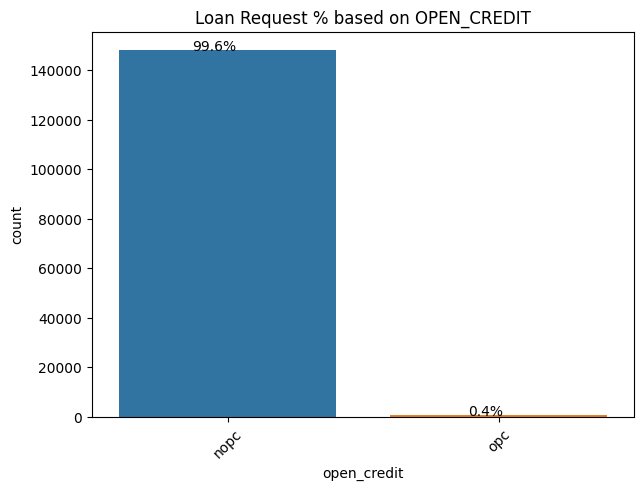

business_or_commercial


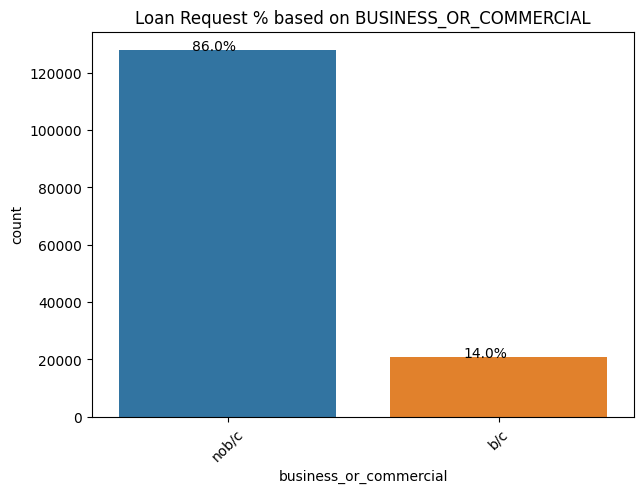

Neg_ammortization


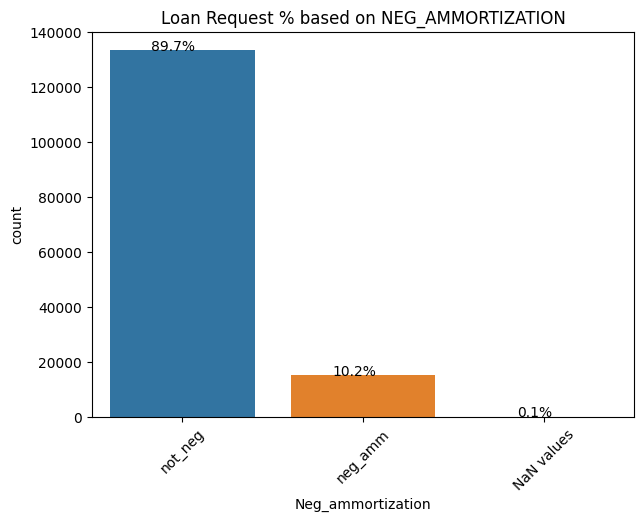

interest_only


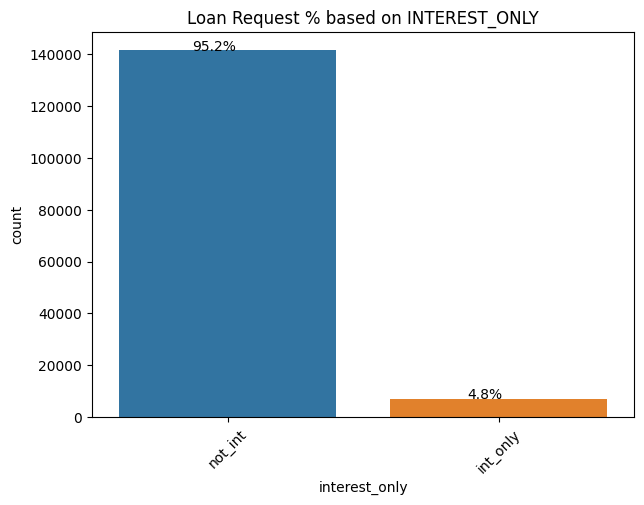

lump_sum_payment


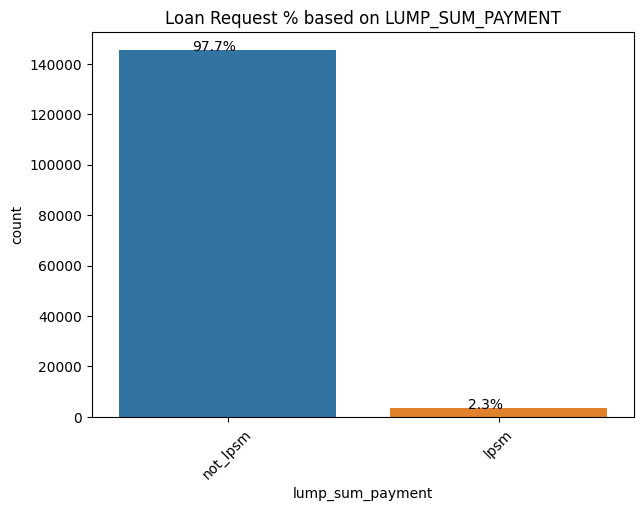

construction_type


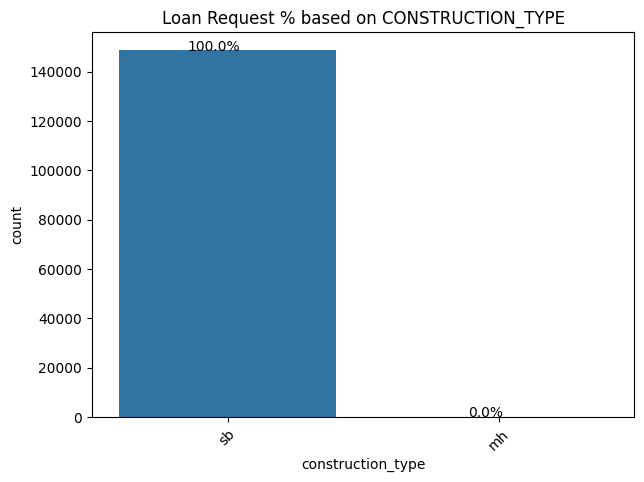

occupancy_type


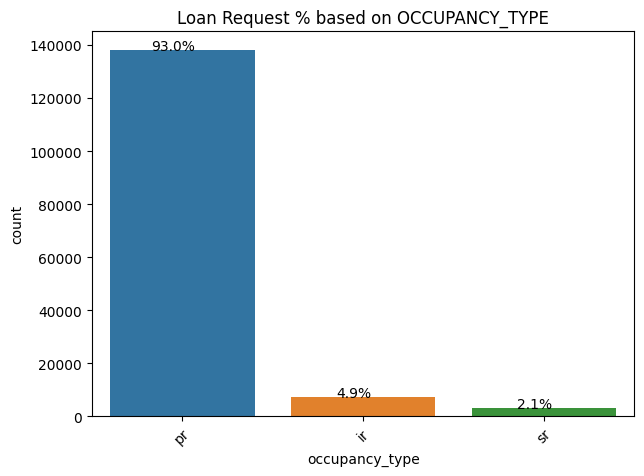

Secured_by


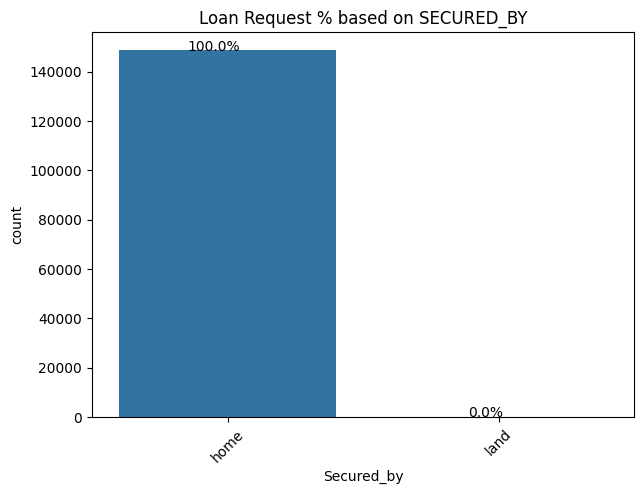

total_units


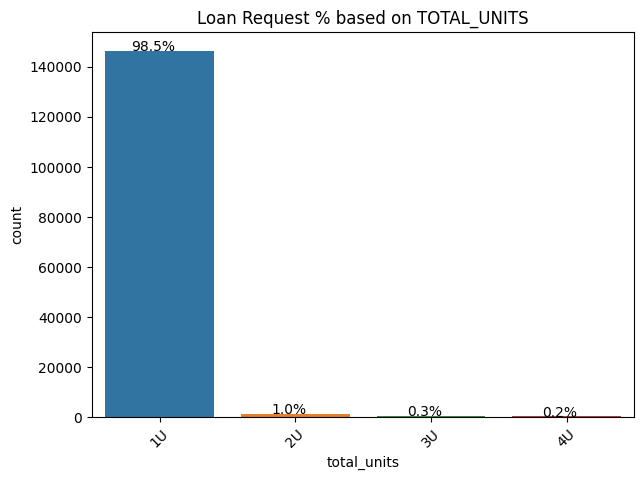

credit_type


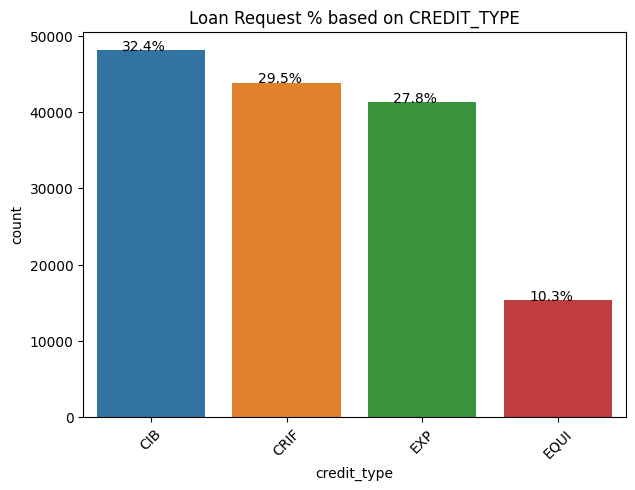

co-applicant_credit_type


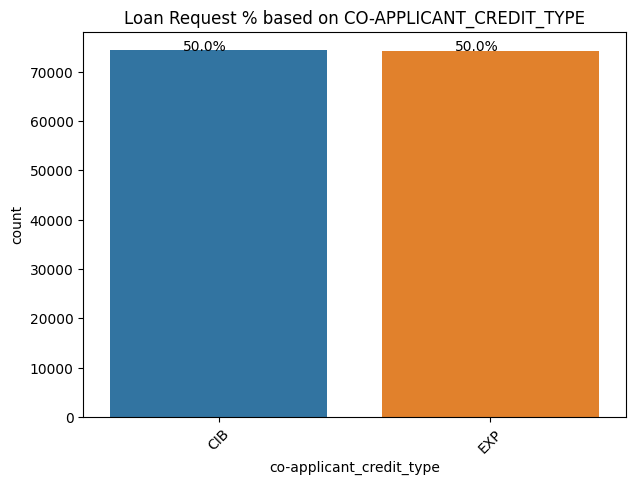

age


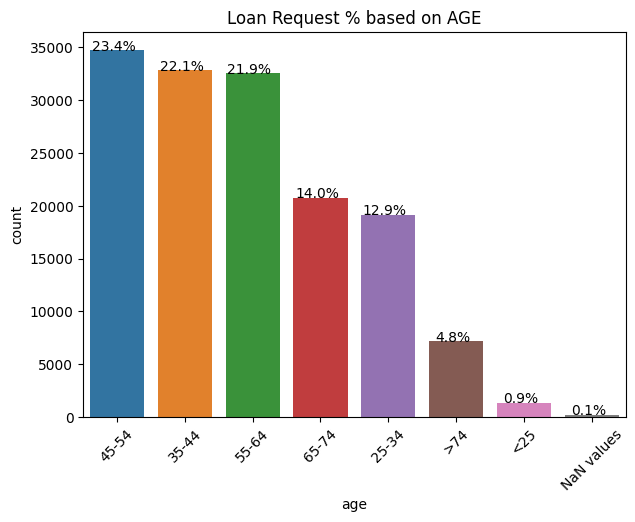

submission_of_application


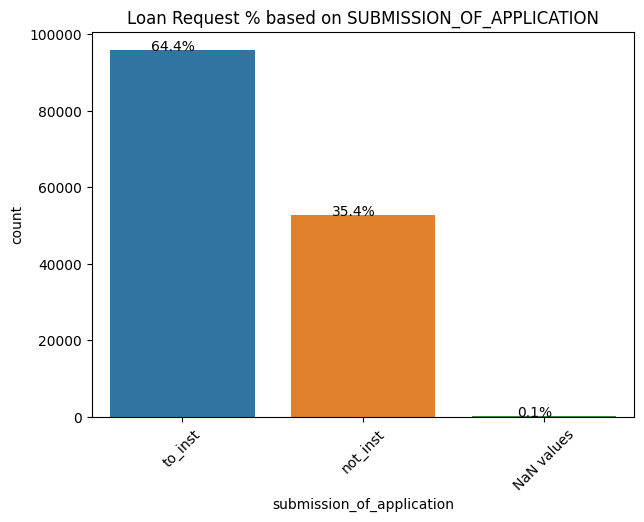

Region


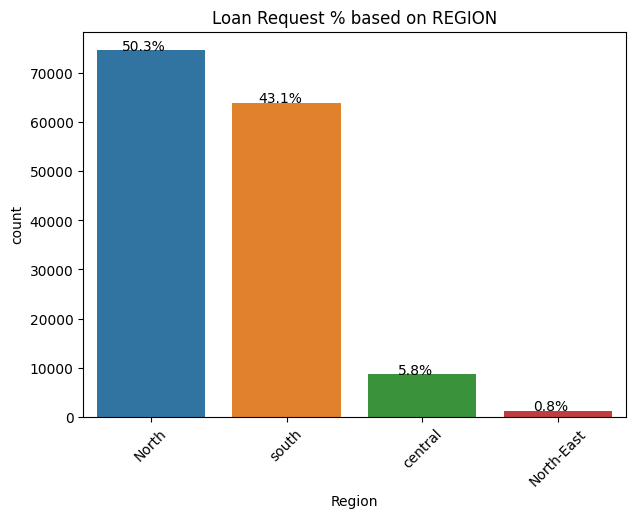

Security_Type


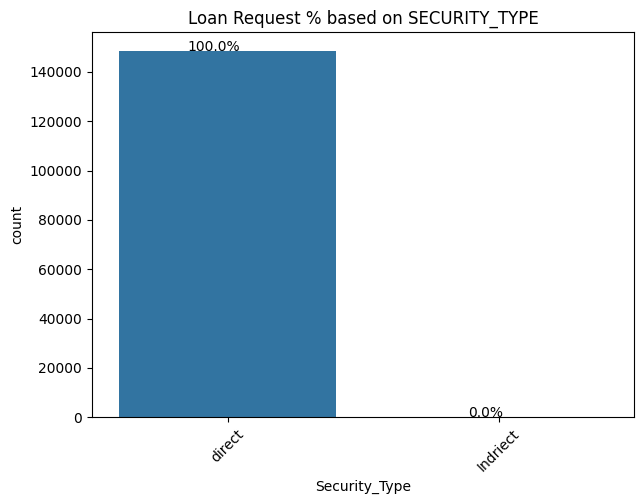

term


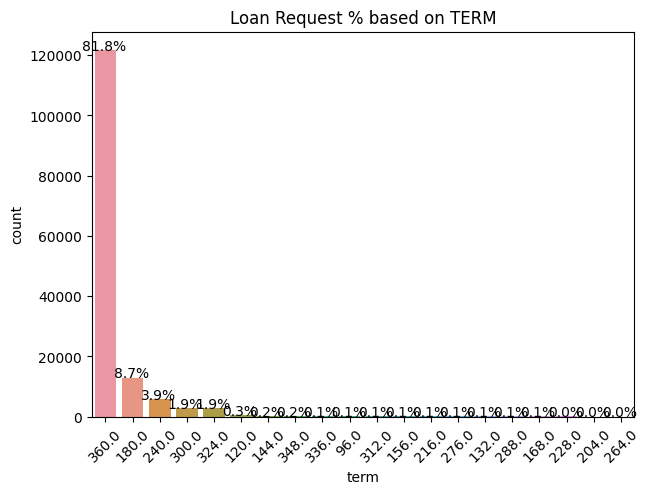

Status


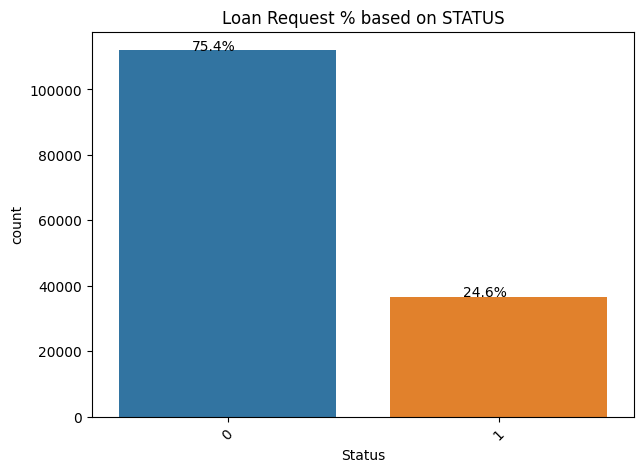

In [8]:
columns = [var for var in raw_data.columns if raw_data[var].dtype=='O'] + ['term', 'Status']
fillna_data = raw_data.fillna('NaN values')

for col in columns:
  print(col)
  total = float(len(fillna_data))
  fig, ax = plt.subplots(figsize=(7, 5))
  sns.countplot(x=col, data=fillna_data, order = fillna_data[col].value_counts().iloc[:20].index, ax=ax)
  plt.title(f'Loan Request % based on {col.upper()}')
  plt.xticks(rotation=45)
  for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/total)
      x = p.get_x() + p.get_width() / 2 - 0.05
      y = p.get_y() + p.get_height()
      ax.annotate(percentage, (x, y),ha='center')
  plt.show()
  print("="*160)

*  About 90+% of the loan applicants has a Cash Flow account
*  There is approximately equal proportion of Male, Female and Joint genders. The 'Sex Not Available' value should be indicated as NaN and these contribute about 25%
*  More than 83% of loan cannot be pre-approved in advance
*  About 76% of loans fall under type1
*  More than 95% of the loan applicants' credit worthiness are in Level1
*  Almost all the applicants are eligible for Open Credit
*  About 86% of the loan applicants are employees(not involved in Business or Commercials)
*  There are 90% of Non-negative ammortization accounts
*  About 96% of the applicants category is under 'Not interest only'
*  About 98% of the loan applicants' requests are for Lump Sum Payment
*  All the loan request are for self-build loan
*  93% of the applicants belong to Principal Residence
*  All the loan requests are secured by house properties
*  About 96% of the loan request are based on 1 unit type
*  About 50% of the North-side people requested for Loan
*  All the applicants are of Direct security type
*  About 82% of the loan requests are for 30years(360 months)
* The target 'Status' is in the proportion of 3:1 (75:25)
---
***The columns with values contributing more than 80% can be dropped - [loan_limit, approv_in_adv, Credit_Worthiness, open_credit, business_or_commercial, Neg_ammortization, interest_only, lump_sum_payment, construction_type, occupancy_type, Secured_by, total_units, Security_Type, term]***


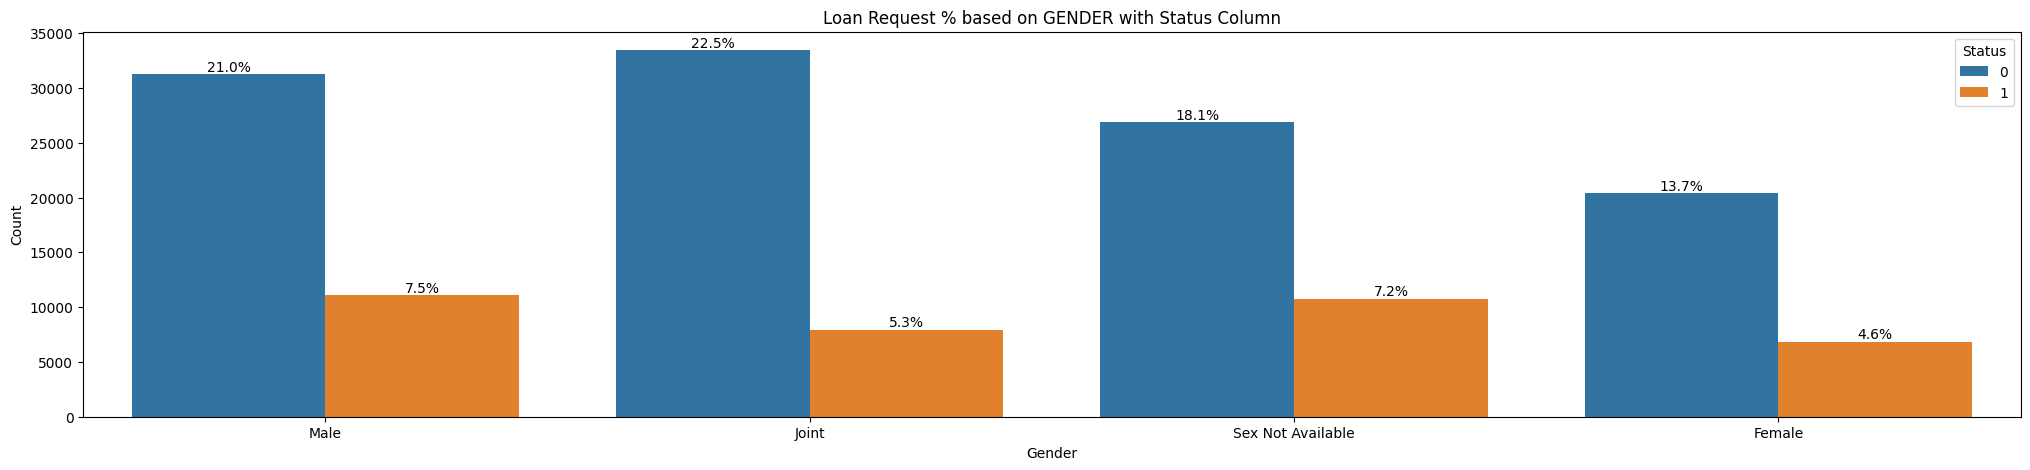

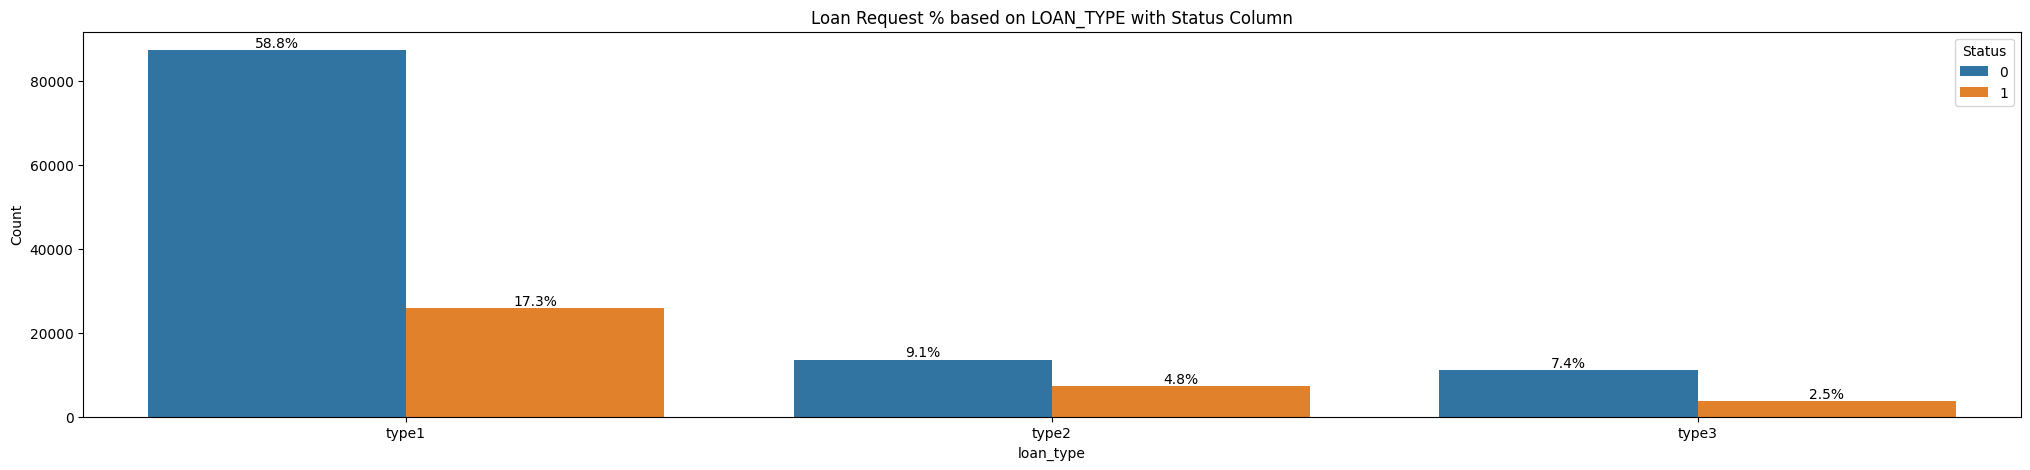

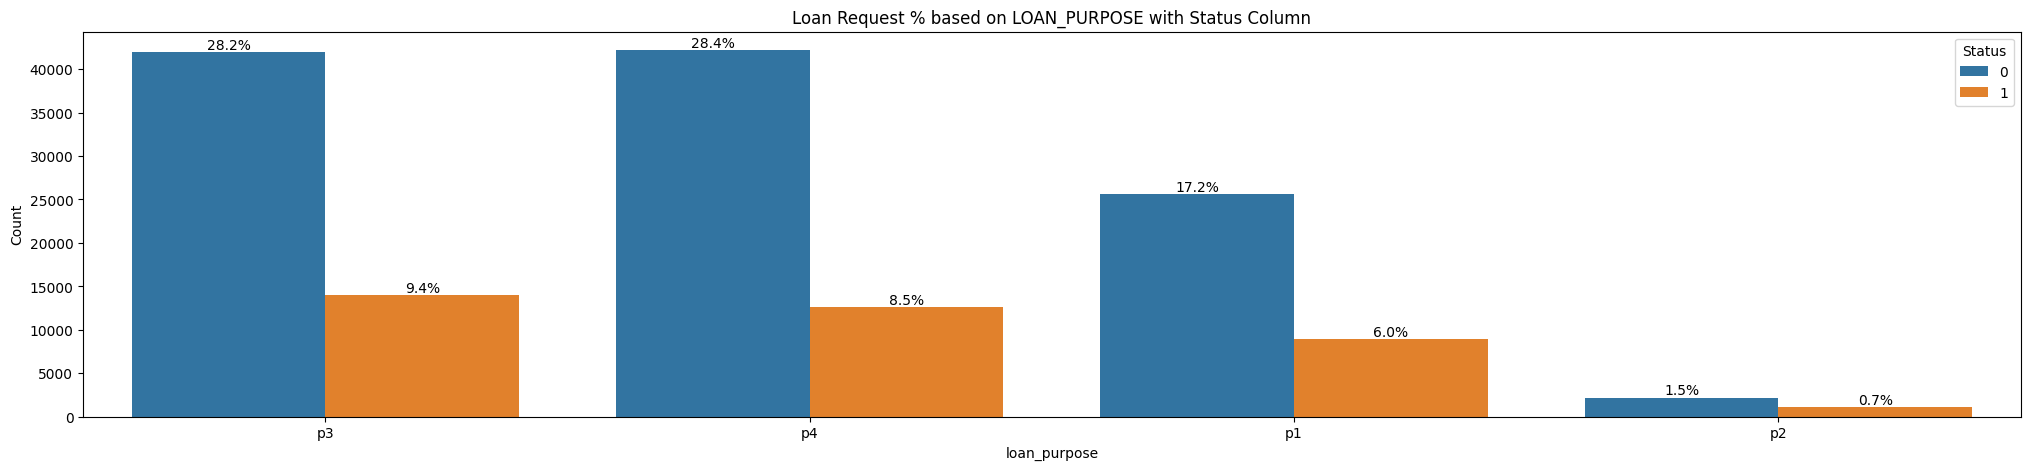

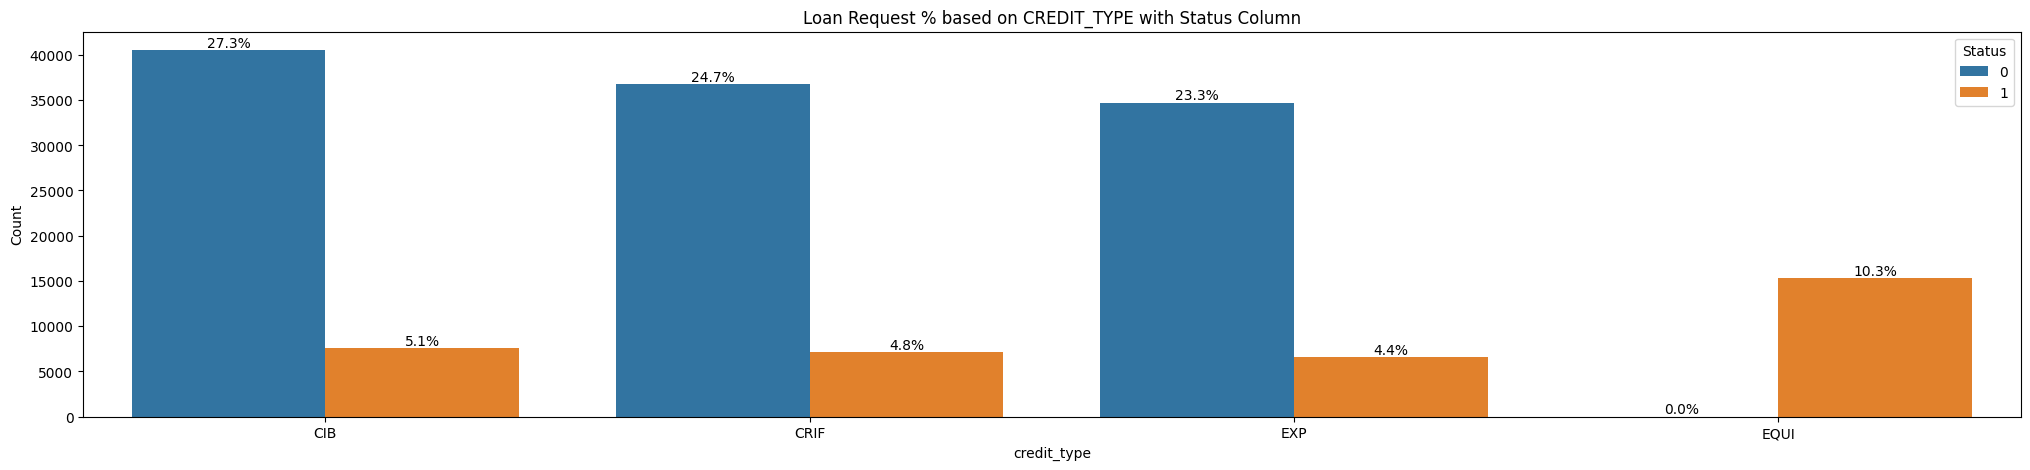

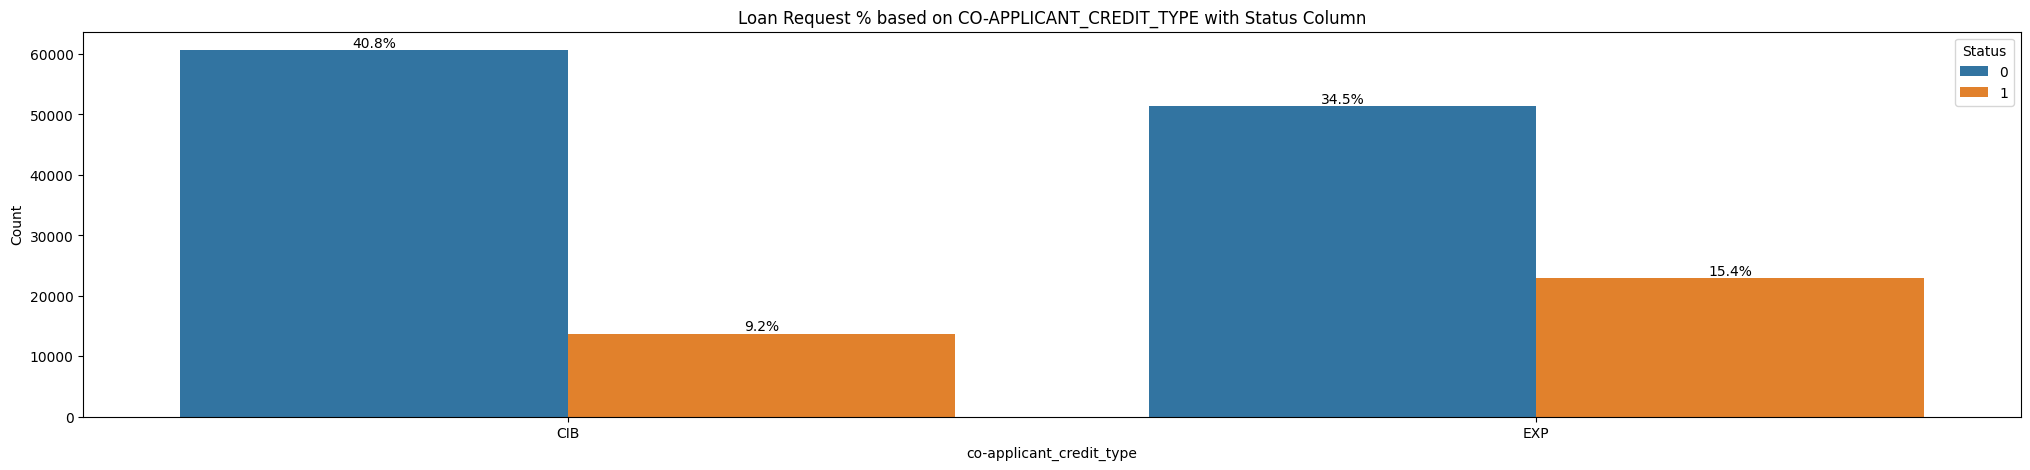

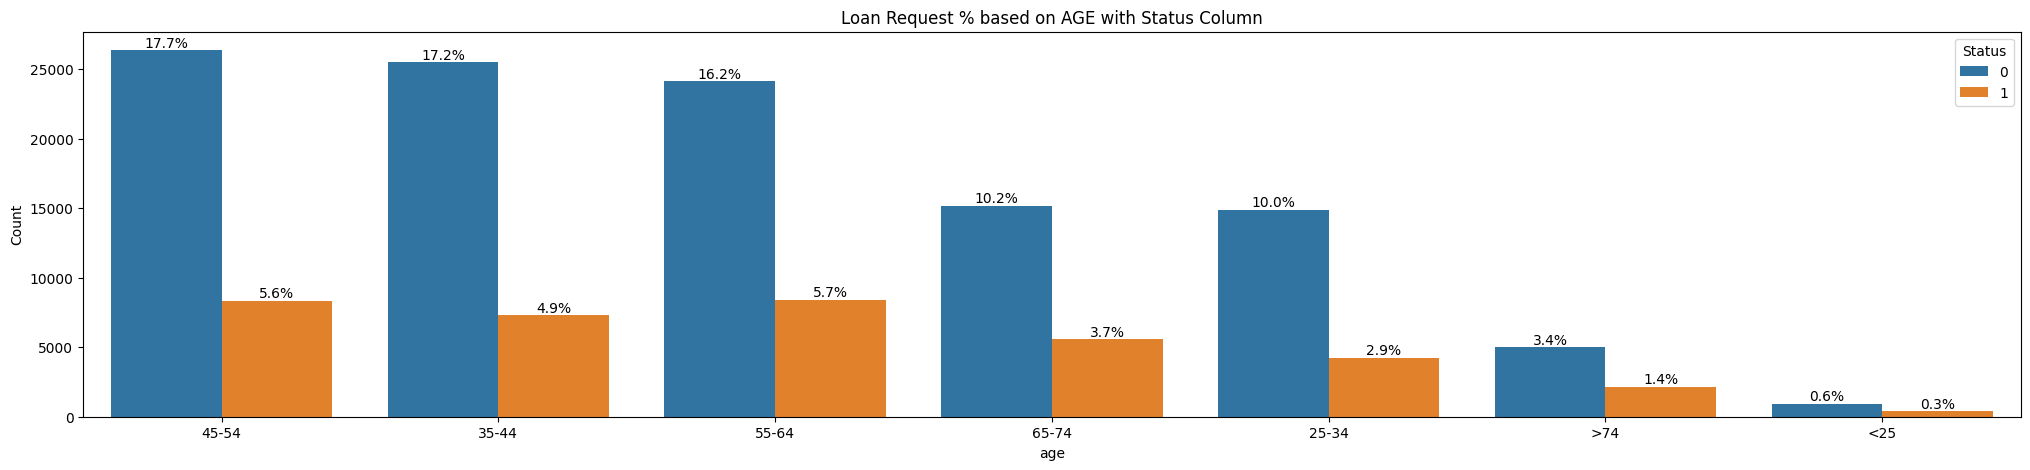

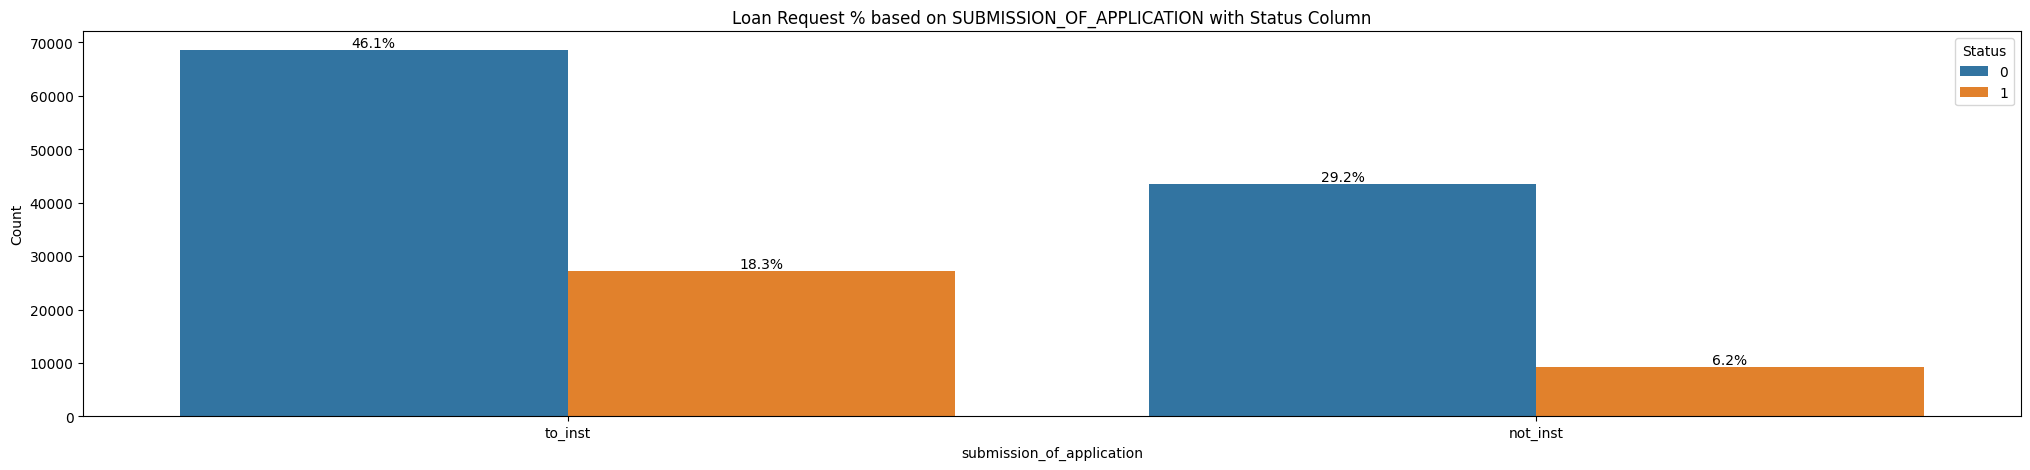

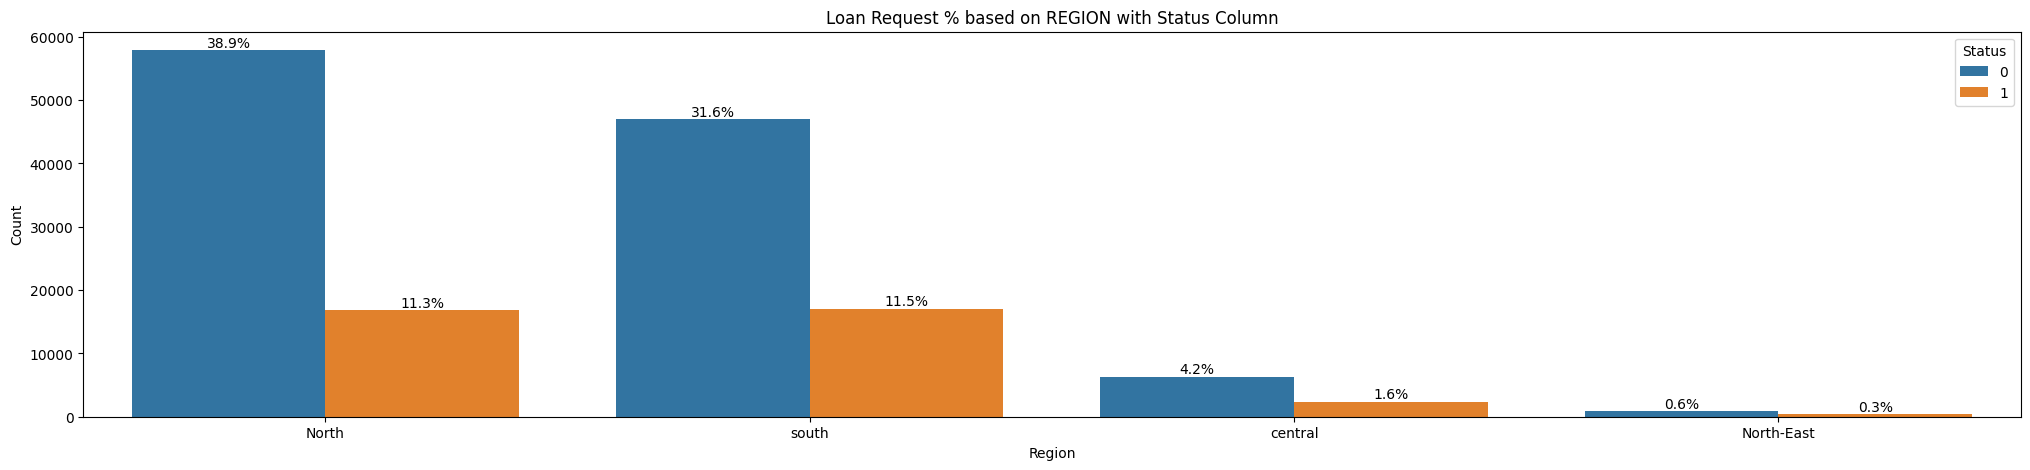

In [9]:
columns = columns = [var for var in raw_data.drop(['loan_limit', 'approv_in_adv', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'Security_Type', 'term', 'Status'], axis=1).columns if raw_data[var].dtype=='O']

for col in columns:
  # print(col)
  fig, ax = plt.subplots(figsize=(25, 5))
  sns.countplot(x=col, hue="Status", data=raw_data, order = raw_data[col].value_counts().iloc[:15].index, ax=ax)
  ax.set(ylabel='Count', title=f'Loan Request % based on {col.upper()} with Status Column')
  # add annotations
  for c in ax.containers:
      # custom label calculates percent and add an empty string so 0 value bars don't have a number
      labels = [f'{h/raw_data.Status.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
      ax.bar_label(c, labels=labels, label_type='edge')
  plt.show()

***We cannot infer the most out of the Status column, because the dataset is imbalanced***


## Outlier Detection

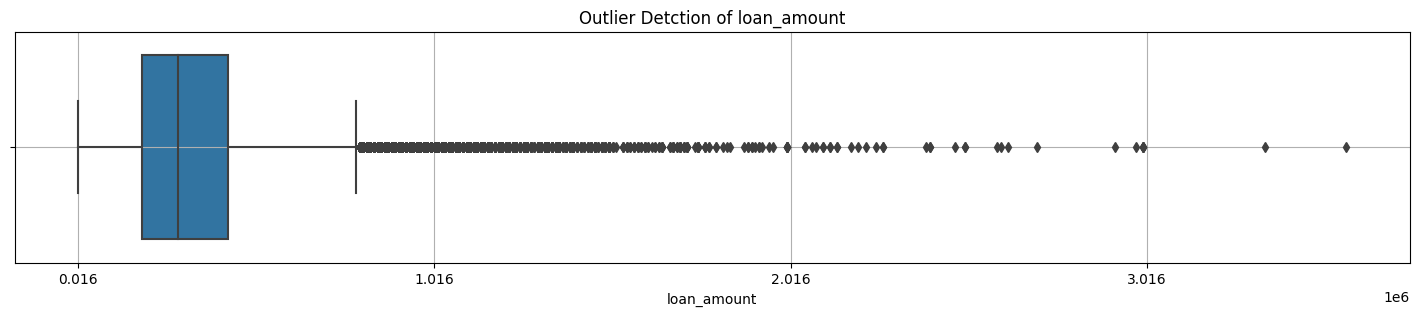

In [10]:
plt.figure(figsize=(18,3))
plt.title('Outlier Detction of loan_amount')
sns.boxplot(x = raw_data['loan_amount'])
plt.grid()
plt.xticks(np.arange(16000, 3577000, step=1000000))
plt.show()

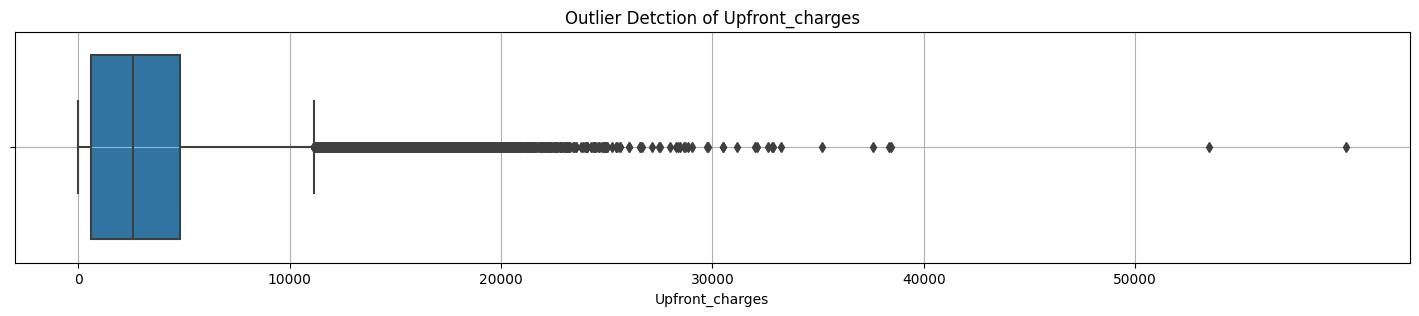

In [11]:
plt.figure(figsize=(18,3))
plt.title('Outlier Detction of Upfront_charges')
sns.boxplot(x = raw_data['Upfront_charges'])
plt.grid()
plt.xticks(np.arange(0, 60000, step=10000))
plt.show()

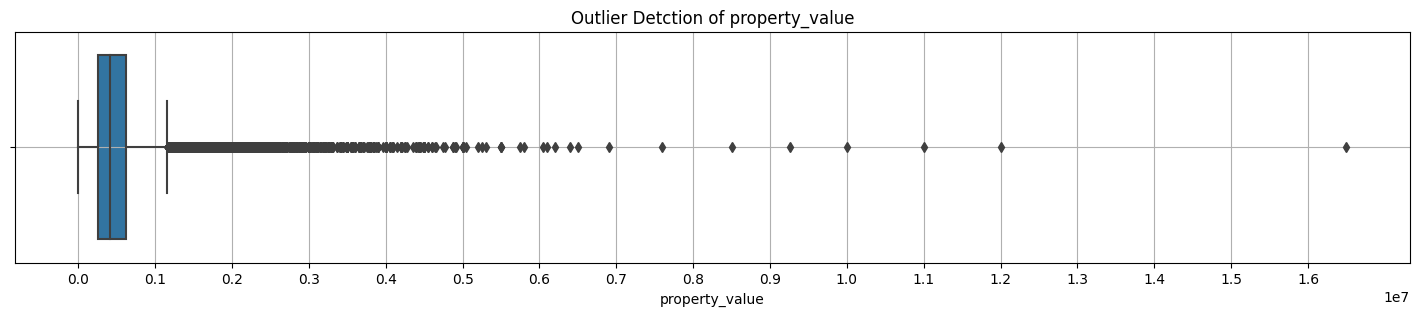

In [12]:
plt.figure(figsize=(18,3))
plt.title('Outlier Detction of property_value')
sns.boxplot(x = raw_data['property_value'])
plt.grid()
plt.xticks(np.arange(8000, 16508500, step=1000000))
plt.show()

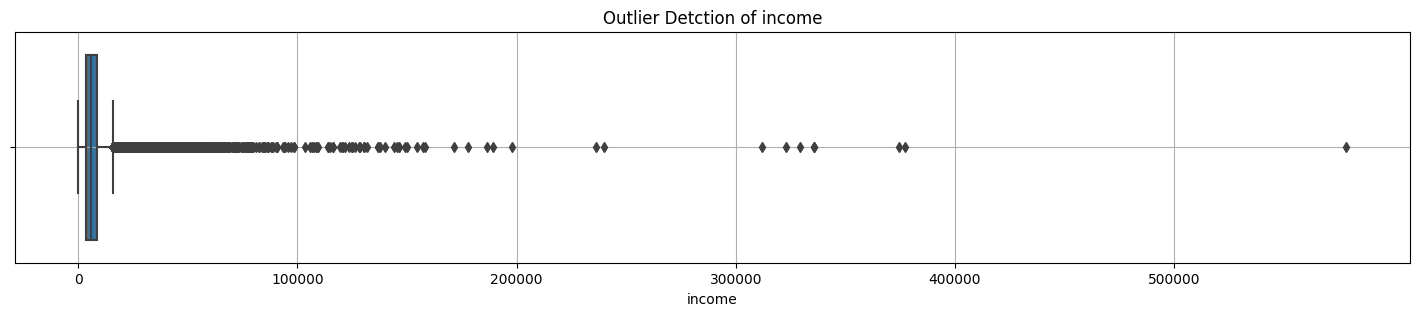

In [13]:
plt.figure(figsize=(18,3))
plt.title('Outlier Detction of income')
sns.boxplot(x = raw_data['income'])
plt.grid()
plt.xticks(np.arange(0, 578600, step=100000))
plt.show()

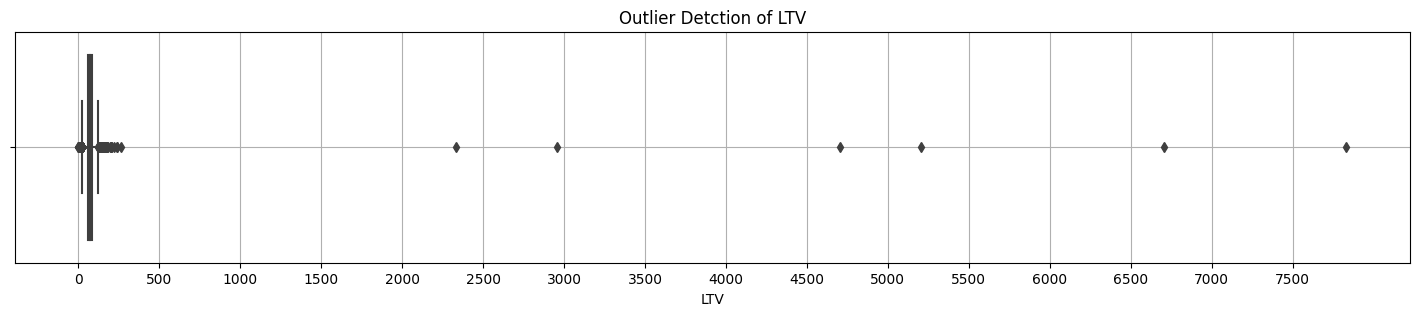

In [14]:
plt.figure(figsize=(18,3))
plt.title('Outlier Detction of LTV')
sns.boxplot(x = raw_data['LTV'])
plt.grid()
plt.xticks(np.arange(0, 7850, step=500))
plt.show()

## Correlation

In [15]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = raw_data[[var for var in raw_data.drop(['ID', 'year'], axis=1).columns if raw_data[var].dtype!='O']].corr()
corr.style.background_gradient(cmap='coolwarm')

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
loan_amount,1.000000,-0.150844,-0.377272,0.065556,0.174474,0.734249,0.456065,0.004438,0.038869,-0.036825,0.015029
rate_of_interest,-0.150844,1.000000,0.614908,-0.076473,0.209330,-0.122613,-0.041809,-0.001331,-0.000220,0.022957,0.055124
Interest_rate_spread,-0.377272,0.614908,1.000000,0.033037,-0.157139,-0.334571,-0.151333,-0.001738,0.040257,nan,0.078178
Upfront_charges,0.065556,-0.076473,0.033037,1.000000,-0.054960,0.053043,0.016580,-0.001484,-0.031347,-0.019138,0.000115
term,0.174474,0.209330,-0.157139,-0.054960,1.000000,0.045117,-0.053785,-0.003149,0.106834,-0.000240,0.110572
property_value,0.734249,-0.122613,-0.334571,0.053043,0.045117,1.000000,0.414883,0.002430,-0.215102,-0.048864,-0.056288
income,0.456065,-0.041809,-0.151333,0.016580,-0.053785,0.414883,1.000000,0.000802,-0.066203,-0.065119,-0.267807
Credit_Score,0.004438,-0.001331,-0.001738,-0.001484,-0.003149,0.002430,0.000802,1.000000,-0.005533,0.004004,-0.000313
LTV,0.038869,-0.000220,0.040257,-0.031347,0.106834,-0.215102,-0.066203,-0.005533,1.000000,0.038895,0.156557
Status,-0.036825,0.022957,nan,-0.019138,-0.000240,-0.048864,-0.065119,0.004004,0.038895,1.000000,0.078083


# Pre-processing

## Dropping Columns with values contributing greater than 80%

In [16]:
drop_cols = raw_data.drop(['year', 'loan_limit', 'approv_in_adv', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'Security_Type', 'term'], axis=1)
drop_cols.head(2)

,ID,Gender,loan_type,loan_purpose,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,property_value,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Status,dtir1
0,24890,Sex Not Available,type1,p1,116500,NaN,NaN,NaN,118000.0,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,1,45.0
1,24891,Male,type2,p1,206500,NaN,NaN,NaN,NaN,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,1,NaN


## Dropping Rows with more than 3 NaN values

In [17]:
drop_rows = drop_cols.copy()
drop_rows['NaN_count'] = drop_rows.isnull().sum(axis=1)
drop_rows.sort_values(['NaN_count'], ascending=[False]).head(5)

,ID,Gender,loan_type,loan_purpose,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,property_value,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Status,dtir1,NaN_count
107911,132801,Female,type1,p4,1166500,NaN,NaN,NaN,NaN,NaN,EQUI,880,EXP,35-44,to_inst,NaN,North,1,NaN,7
68371,93261,Male,type1,NaN,206500,NaN,NaN,NaN,NaN,3300.0,EQUI,613,EXP,25-34,not_inst,NaN,south,1,NaN,7
3765,28655,Male,type1,NaN,1366500,NaN,NaN,NaN,NaN,18000.0,EQUI,643,EXP,45-54,to_inst,NaN,North,1,NaN,7
53314,78204,Sex Not Available,type3,p4,256500,NaN,NaN,NaN,NaN,NaN,EQUI,679,EXP,65-74,to_inst,NaN,south,1,NaN,7
7124,32014,Sex Not Available,type1,p1,216500,NaN,NaN,NaN,NaN,NaN,EQUI,644,EXP,45-54,to_inst,NaN,south,1,NaN,7


In [18]:
drop_rows_ = drop_rows[drop_rows['NaN_count']<=3]
drop_rows_.sort_values(['NaN_count'], ascending=[False]).head(5)

,ID,Gender,loan_type,loan_purpose,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,property_value,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Status,dtir1,NaN_count
0,24890,Sex Not Available,type1,p1,116500,NaN,NaN,NaN,118000.0,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,1,45.0,3
36430,61320,Male,type1,p4,446500,NaN,NaN,NaN,928000.0,10860.0,CRIF,652,CIB,45-54,to_inst,48.114224,central,1,43.0,3
62744,87634,Sex Not Available,type2,p3,226500,NaN,NaN,NaN,338000.0,2940.0,CRIF,776,CIB,25-34,not_inst,67.011834,south,1,48.0,3
120596,145486,Male,type1,p4,266500,NaN,NaN,NaN,338000.0,3240.0,EXP,773,CIB,45-54,to_inst,78.846154,south,1,37.0,3
100430,125320,Female,type1,p3,316500,NaN,NaN,NaN,398000.0,11160.0,EXP,700,CIB,45-54,to_inst,79.522613,North-East,1,37.0,3


## Replacing Error Values

In [19]:
err = drop_rows_.replace({'Gender' : {'Sex Not Available' : np.nan}})
err

,ID,Gender,loan_type,loan_purpose,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,property_value,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Status,dtir1,NaN_count
0,24890,NaN,type1,p1,116500,NaN,NaN,NaN,118000.0,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,1,45.0,3
2,24892,Male,type1,p1,406500,4.560,0.2000,595.00,508000.0,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,0,46.0,0
3,24893,Male,type1,p4,456500,4.250,0.6810,NaN,658000.0,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,0,42.0,1
4,24894,Joint,type1,p1,696500,4.000,0.3042,0.00,758000.0,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,0,39.0,0
5,24895,Joint,type1,p1,706500,3.990,0.1523,370.00,1008000.0,10080.0,EXP,864,EXP,35-44,not_inst,70.089286,North,0,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,NaN,type1,p3,436500,3.125,0.2571,9960.00,608000.0,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,0,48.0,0
148666,173556,Male,type1,p1,586500,5.190,0.8544,0.00,788000.0,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,0,15.0,0
148667,173557,Male,type1,p4,446500,3.125,0.0816,1226.64,728000.0,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,0,49.0,0
148668,173558,Female,type1,p4,196500,3.500,0.5824,4323.33,278000.0,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,0,29.0,0


The dataset is very poor to perform analysis